In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_n_birthdays(n):
    bd_list = []
    for i in range(n):
        bd_list.append(random.randint(1,365))
        
    return bd_list

In [3]:
def check_if_two_bd_lists_share_bd(bd_list_1, bd_list_2):
    for bd in bd_list_1:
        if bd in bd_list_2:
            return True
        
    return False

In [4]:
def create_random_birthday_experiment(n1, n2, use_same_list=False):
    bd_list_1 = generate_n_birthdays(n1)
    
    if use_same_list:
        for i,bd in enumerate(bd_list_1):
            ind_bd = [bd]
            rest_of_list = [b for j,b in enumerate(bd_list_1) if j != i]
            if check_if_two_bd_lists_share_bd(ind_bd, rest_of_list):
                return True
        return False

    bd_list_2 = generate_n_birthdays(n2)
    return check_if_two_bd_lists_share_bd(bd_list_1, bd_list_2)

In [5]:
def get_probability_from_lln(m, n1, n2, use_same_list=False):
    exp_result_list = []
    for i in range(m):
        exp_result = create_random_birthday_experiment(n1, n2, use_same_list=use_same_list)
        exp_result_list.append(exp_result)
        
    return exp_result_list.count(True)/float(len(exp_result_list))

In [6]:
get_probability_from_lln(2000, 1, 150, use_same_list=False)

0.3105

In [7]:
bd_probs = []
for n in range(200):
    prob = get_probability_from_lln(2000, 1, n, use_same_list=False)
    bd_probs.append(prob)

Text(0.5, 1.0, 'Probability of one individual finding a person with the same birthday in a room of n people')

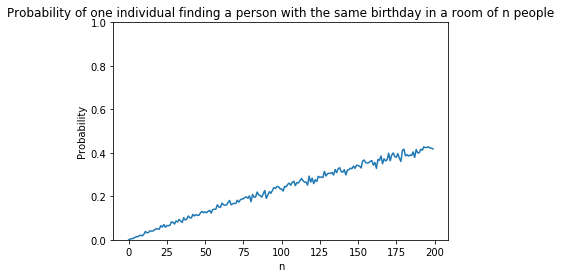

In [8]:
plt.plot(range(len(bd_probs)), bd_probs)
plt.ylim(0,1.0)
plt.xlabel("n")
plt.ylabel("Probability")
plt.title("Probability of one individual finding a person with the same birthday in a room of n people")

In [9]:
bd_probs = []
for n in range(200):
    prob = get_probability_from_lln(2000, 2, n, use_same_list=False)
    bd_probs.append(prob)

Text(0.5, 1.0, 'Probability of two individuals finding a person with the same birthday in a room of n people')

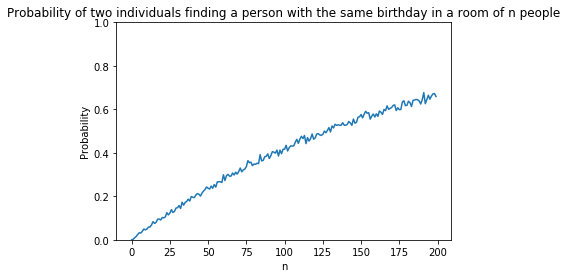

In [10]:
plt.plot(range(len(bd_probs)), bd_probs)
plt.ylim(0,1.0)
plt.xlabel("n")
plt.ylabel("Probability")
plt.title("Probability of two individuals finding a person with the same birthday in a room of n people")

In [11]:
bd_probs = []
for n in range(50):
    prob = get_probability_from_lln(2000, n, 0, use_same_list=True)
    bd_probs.append(prob)

Text(0.5, 1.0, 'Probability of a room of n people having at least two people with same birthday')

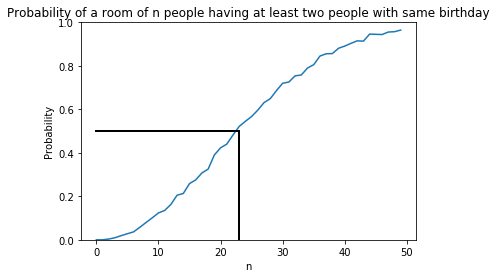

In [19]:
plt.plot(range(len(bd_probs)), bd_probs)
plt.ylim(0,1.0)
plt.plot([23,23], [0, 0.5], 'k-', lw=2)
plt.plot([0,23],[0.5,0.5],'k-',lw=2)
plt.xlabel("n")
plt.ylabel("Probability")
plt.title("Probability of a room of n people having at least two people with same birthday")


In [20]:
from pylab import *
import numpy as np

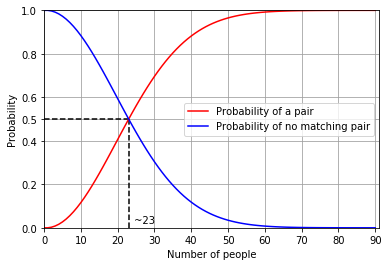

In [27]:
def makePlot(
        generatePlot = True,
        outputFilename = r'Birthday_paradox.svg',
        useYLogScale = False):
    N=91
    n = np.arange(float(N))
    pbar=np.exp(-n* (n-1) / (2.0*365.0))
    p=1.0-pbar
 
    n05 = 0.5*(1.0+np.sqrt(1-8.0*365.0*np.log(1.0-0.5)))
    plot([n05,n05],[0.0,0.5],c='k', linestyle='--')
    plot([0.0,n05],[0.5,0.5],c='k', linestyle='--')
    text(23.5,0.02,' ~23')
    if generatePlot:
        plot(n,p   ,c='r',label = ('Probability of a pair'))
        plot(n,pbar,c='b',label = ('Probability of no matching pair'))
 
    legend(loc='right')
    xlim(0, N)
    if useYLogScale:
        ylim(1e-6, 1)
        ax = gca()
        ax.set_yscale('log')
    else:
        ylim(0, 1)
        yticks([0.0,0.2,0.4,0.5,0.6,0.8,1.0])
    xticks(range(0, N, 10))
    grid(True, ls='-', c='#a0a0a0')
    if generatePlot:
        xlabel('Number of people')
        ylabel('Probability')
    savefig(outputFilename)
    show()
 
makePlot(generatePlot = True, outputFilename = r'Birthday_paradox.svg')